In [2]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) 
        self.activation_function=lambda x:scipy.special.expit(x)
    pass

    def train(self,inputs_list,targets_list):
            inputs = numpy.array(inputs_list, ndmin=2).T
            targets = numpy.array(targets_list, ndmin=2).T
            hidden_inputs = numpy.dot(self.wih, inputs)
            hidden_outputs = self.activation_function(hidden_inputs)
            final_inputs = numpy.dot(self.who, hidden_outputs)
            final_outputs = self.activation_function(final_inputs)
            output_errors = targets - final_outputs
            hidden_errors = numpy.dot(self.who.T, output_errors)
            self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))  
            self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs)) 
    pass

    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)    
        hidden_outputs = self.activation_function(hidden_inputs)       
        final_inputs = numpy.dot(self.who, hidden_outputs)             
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
pass

In [3]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.1
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
training_data_file=open("mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    pass
pass

In [4]:
test_data_file=open("mnist_test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

In [8]:
all_values=test_data_list[0].split(',')
print(all_values[0])

7


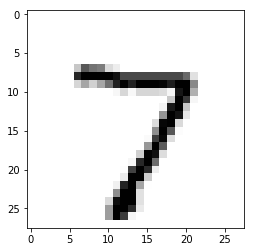

In [9]:
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [13]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[  1.95931161e-02],
       [  1.77604472e-03],
       [  1.18820029e-02],
       [  1.71429252e-03],
       [  1.29683869e-03],
       [  1.24747649e-03],
       [  2.36259005e-03],
       [  9.99574238e-01],
       [  6.57058598e-05],
       [  1.11313322e-03]])

In [45]:
n.query([1.0,0.5,-1.5])

array([[ 0.28788473],
       [ 0.62666513],
       [ 0.55875302]])

In [5]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
pass

In [6]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9698
